In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
full_annualpath = "data/full_yearly.csv"
full_annual = pd.read_csv(full_annualpath)
full_annual
# drop index

,Unnamed: 0,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Avg. Fire Duration (Days),Median Fire Duration (Days),Mean Snow Depth (in),Max Snow Depth (in)
0,0,2013,14,2264.43,106.0,2.78,1.07,44.159260,295
1,1,2014,9,10943.00,85.0,4.62,1.58,38.538925,295
2,2,2015,13,5788.54,104.0,6.67,3.94,23.513959,313
3,3,2016,30,161.07,87.5,2.26,1.18,54.926675,311
4,4,2017,51,819.82,76.0,166.19,171.80,94.216049,312
5,5,2018,27,5906.89,67.0,148.46,155.84,29.630063,202
6,6,2019,21,82.05,50.0,3.31,0.70,84.848012,330
7,7,2020,30,1967.23,77.0,2.08,0.73,40.437400,332
8,8,2021,17,4254.88,118.0,11.89,1.92,43.722304,322
9,9,2022,12,113.17,41.5,5.88,4.02,43.059042,329


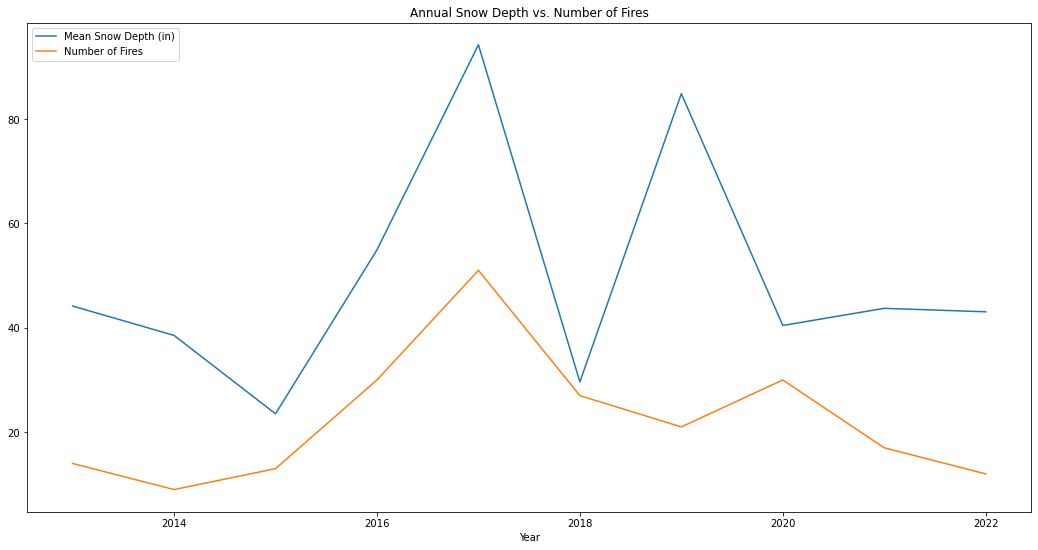

In [19]:
x_data = full_annual["Year"]
y_data = full_annual["Mean Snow Depth (in)"] 
y_data1 = full_annual["Number of Fires"]
plt.figure(figsize=(18,9))

snow_depth = plt.plot(x_data, y_data, label = "Mean Snow Depth (in)")
fire_numbers = plt.plot(x_data, y_data1, label = "Number of Fires")
plt.legend(loc = "upper left")
plt.xlabel("Year")
plt.title("Annual Snow Depth vs. Number of Fires")
plt.show()